<a href="https://colab.research.google.com/github/martinparlanti/Portfolios-with-ETFs/blob/main/Correlacion_y_portfolios_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install yfinance
!pip install pandas

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [30]:

etfs = ['XLE','XLF','XLU','XLI','GDX','XLK','XLV','XLY','XLP','XLB','XOP','IYR','XHB','ITB','VNQ'
        ,'GDXJ','IYE','OIH','XME','XRT','SMH','IBB','KBE','KRE','XTL']

start_date = '2010-01-01'
end_date = dt.datetime.now()

data = yf.download(etfs, start = start_date, end = end_date)['Close'] #Adj Closed: cierres de precios ajustados que comprenden los splits, las divisiones y los dividendos de la empresa

print(data.columns)


/tmp/ipython-input-346593385.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(etfs, start = start_date, end = end_date)['Close'] #Adj Closed: cierres de precios ajustados que comprenden los splits, las divisiones y los dividendos de la empresa
[*********************100%***********************]  25 of 25 completed


Index(['GDX', 'GDXJ', 'IBB', 'ITB', 'IYE', 'IYR', 'KBE', 'KRE', 'OIH', 'SMH',
       'VNQ', 'XHB', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV',
       'XLY', 'XME', 'XOP', 'XRT', 'XTL'],
      dtype='object', name='Ticker')


Ticker            GDX        GDXJ         IBB        ITB        IYE  \
Date                                                                  
2025-12-30  86.839996  115.139999  168.889999  97.290001  47.810001   
2025-12-31  85.769997  113.779999  168.770004  96.300003  47.529999   
2026-01-02  85.730003  113.199997  169.000000  97.489998  48.549999   
2026-01-05  88.449997  117.339996  167.339996  98.269997  49.730000   
2026-01-06  92.139999  121.879997  171.240005  98.980003  48.439999   

Ticker            IYR        KBE        KRE         OIH         SMH  ...  \
Date                                                                 ...   
2025-12-30  94.709999  61.259998  65.440002  286.890015  363.309998  ...   
2025-12-31  93.889999  60.689999  64.809998  284.769989  360.130005  ...   
2026-01-02  93.989998  61.169998  65.239998  295.989990  373.299988  ...   
2026-01-05  94.129997  62.410000  66.559998  311.679993  377.589996  ...   
2026-01-06  94.790001  62.950001  67.230003  3

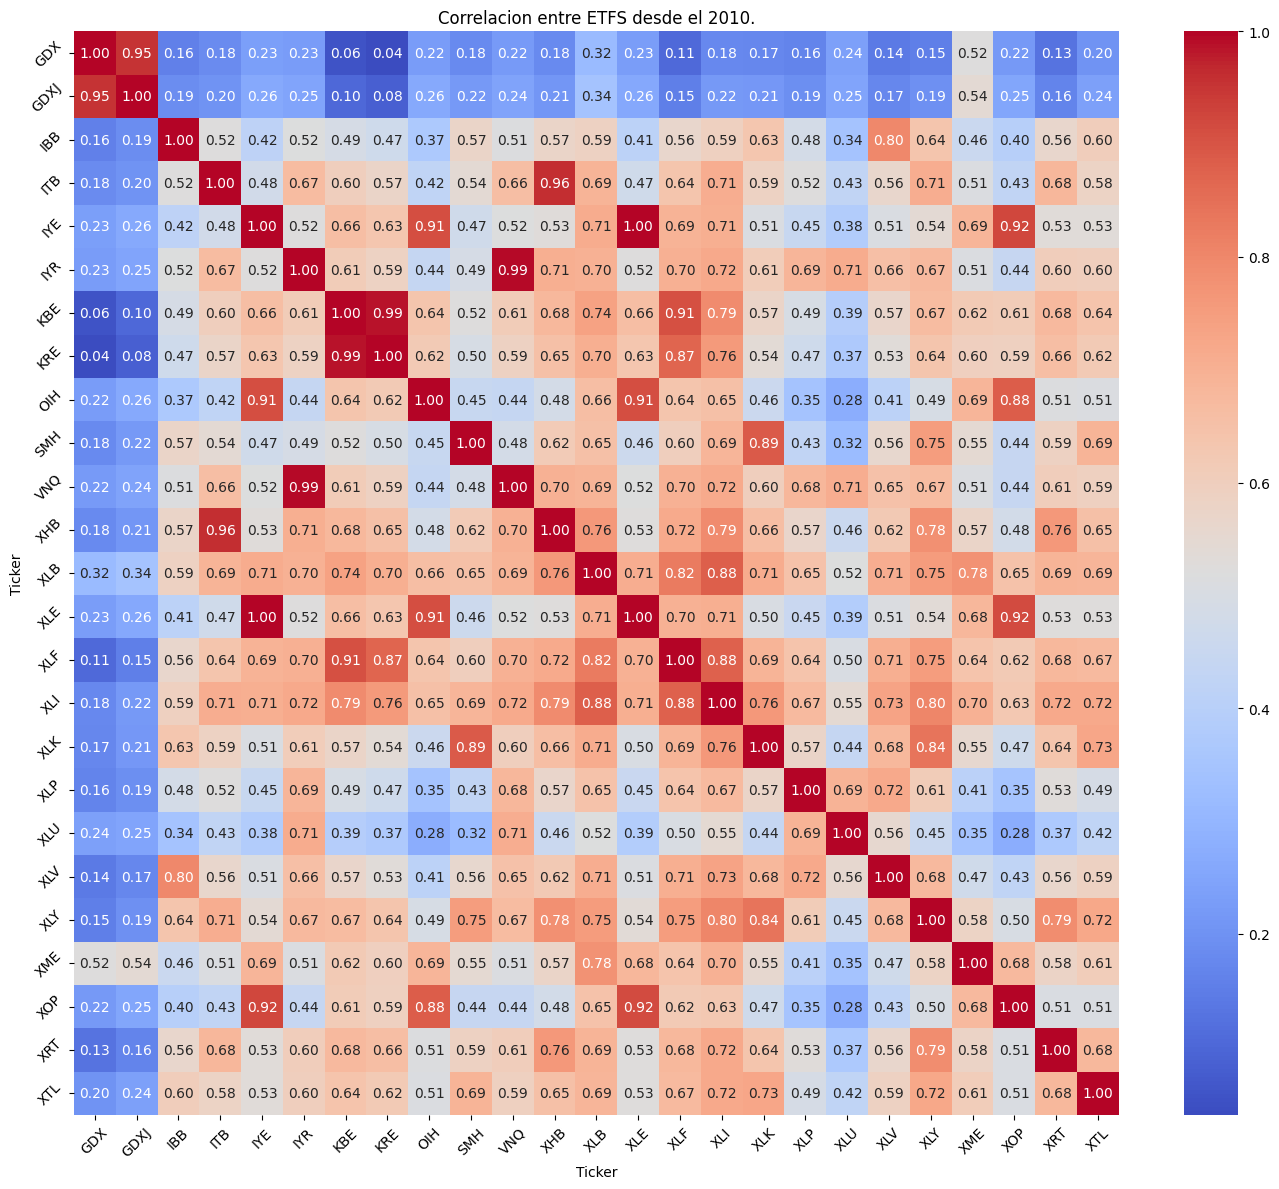

In [31]:
returns = data.pct_change().dropna()

correlation_returns = returns.corr()


plt.figure(figsize=(14,12))

sns.heatmap(correlation_returns, annot=True, fmt=".2f",cmap='coolwarm')

plt.title('Correlacion entre ETFS desde el 2010.')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout() #ajustamos el grafico, la matriz para que no se rompa

print(data.tail())
plt.show()




In [32]:
correlated_pairs=[]
for i in range(len(correlation_returns.columns)):
  for j in range(i+1, len(correlation_returns.columns)):
    etf1 = correlation_returns.columns[i]
    etf2 = correlation_returns.columns[j]
    correlation = correlation_returns.iloc[i, j]
    if pd.notna(correlation) and correlation != 1:
      correlated_pairs.append((etf1, etf2, correlation))

In [33]:
sorted_correlated_pairs = sorted(correlated_pairs, key = lambda x: x[2], reverse = True)
top_5_correlated_pairs = sorted_correlated_pairs[:5]

In [34]:
print("Top 5 ETFs más positivamente correlacionados:")
for etf1, etf2, correlation in top_5_correlated_pairs:
    print(f"  {etf1} y {etf2}: {correlation:.2f}")

Top 5 ETFs más positivamente correlacionados:
  IYE y XLE: 1.00
  IYR y VNQ: 0.99
  KBE y KRE: 0.99
  ITB y XHB: 0.96
  GDX y GDXJ: 0.95


In [35]:
sorted_less_correlated_pairs = sorted(correlated_pairs, key = lambda x: x[2], reverse = False)
top_5_less_correlated_pairs = sorted_less_correlated_pairs[:5]

In [36]:
print("Top 5 ETFs menos positivamente correlacionados:")
for etf1, etf2, correlation in top_5_less_correlated_pairs:
    print(f"  {etf1} y {etf2}: {correlation:.2f}")

Top 5 ETFs menos positivamente correlacionados:
  GDX y KRE: 0.04
  GDX y KBE: 0.06
  GDXJ y KRE: 0.08
  GDXJ y KBE: 0.10
  GDX y XLF: 0.11


In [37]:
annualized_returns = returns.mean() * 252
annualized_covariance = returns.cov() * 252

print("Rendimientos diarios anualizados (media):")
print(annualized_returns.head())
print("\nMatriz de covarianza anualizada (primeras 5x5 filas y columnas):")
print(annualized_covariance.iloc[:5, :5])

Rendimientos diarios anualizados (media):
Ticker
GDX     0.117810
GDXJ    0.116095
IBB     0.143667
ITB     0.179558
IYE     0.079170
dtype: float64

Matriz de covarianza anualizada (primeras 5x5 filas y columnas):
Ticker       GDX      GDXJ       IBB       ITB       IYE
Ticker                                                  
GDX     0.144724  0.165714  0.014511  0.020221  0.024226
GDXJ    0.165714  0.209110  0.020702  0.027071  0.033068
IBB     0.014511  0.020702  0.057377  0.036180  0.027581
ITB     0.020221  0.027071  0.036180  0.084303  0.038221
IYE     0.024226  0.033068  0.027581  0.038221  0.075870


In [38]:
num_portafolios = 1000
num_etfs = len(etfs)

In [39]:
portfolio_weights = []
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe_ratios = []


In [40]:
for i in range(num_portafolios):
  weights = np.random.random(num_etfs)
  weights /= np.sum(weights)
  portfolio_weights.append(weights)


In [41]:
portfolio_return = np.dot(weights, annualized_returns)
portfolio_returns.append(portfolio_return)

In [42]:
portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(annualized_covariance,weights)))
portfolio_volatilities.append(portfolio_volatility)

In [43]:
portfolio_sharpe_ratio = portfolio_return/portfolio_volatility
portfolio_sharpe_ratios.append(portfolio_sharpe_ratio)

In [47]:
portfolio_results = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatilities,
    'Sharpe Ratio': portfolio_sharpe_ratios
})

# Add individual ETF weights as columns to the DataFrame
etf_weights_df = pd.DataFrame(portfolio_weights, columns=etfs)
portfolio_results = pd.concat([portfolio_results, etf_weights_df], axis=1)

print("First 10 rows of the simulated portfolio results:")
print(portfolio_results.head(10))

First 10 rows of the simulated portfolio results:
     Return  Volatility  Sharpe Ratio       XLE       XLF       XLU       XLI  \
0  0.126317    0.199394      0.633502  0.061528  0.051962  0.024470  0.000801   
1  0.123513    0.200965      0.614599  0.042583  0.017229  0.023213  0.028448   
2  0.119284    0.187965      0.634607  0.018480  0.072726  0.005839  0.000936   
3  0.120583    0.208325      0.578821  0.010023  0.043492  0.016615  0.072197   
4  0.125056    0.203438      0.614715  0.040879  0.006175  0.061768  0.052556   
5  0.133256    0.182291      0.731010  0.066585  0.049253  0.066978  0.061878   
6  0.129981    0.197558      0.657940  0.074391  0.072361  0.058809  0.068617   
7  0.121503    0.186673      0.650886  0.020728  0.038106  0.016422  0.042059   
8  0.122054    0.198754      0.614094  0.003058  0.051114  0.070778  0.029608   
9  0.118235    0.193025      0.612540  0.071027  0.041224  0.051881  0.060455   

        GDX       XLK       XLV  ...      GDXJ       IYE  